In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_generator import get_data, add_bucket_AQ10_Score
from src.stats import get_statistics_for_AQ10
from scipy.stats import pearsonr as perason_test

In [2]:
data = get_data()
print(data.columns)
data.head(5)

Index(['Participant_N', 'Age', 'Education', 'BUCKETED_Education', 'Gender',
       'Handedness', 'Self_ID', 'AQ10_Score', 'Hand_Cms', 'Arm_Cms',
       'TextureScore', 'SizeScore', 'WeightScore', 'SummedUpScore',
       'FullGuessScore'],
      dtype='object')


,Participant_N,Age,Education,BUCKETED_Education,Gender,Handedness,Self_ID,AQ10_Score,Hand_Cms,Arm_Cms,TextureScore,SizeScore,WeightScore,SummedUpScore,FullGuessScore
0,1,18,UG1,UG,male,right,6,4,18.0,72.0,4,4,2,6,2
1,2,18,UG1,UG,female,right,6,5,17.0,63.5,3,4,4,7,3
2,3,26,postGrad,gradNHigher,male,right,6,4,21.0,84.0,4,4,2,6,2
3,4,23,postGrad,gradNHigher,male,right,6,3,19.0,71.5,2,4,4,6,2
4,5,24,postGrad,gradNHigher,male,right,6,1,20.5,79.5,3,4,4,7,3


In [3]:
print(perason_test(data.AQ10_Score, data.TextureScore))
print(perason_test(data.AQ10_Score, data.SizeScore))
print(perason_test(data.AQ10_Score, data.WeightScore))
print(perason_test(data.AQ10_Score, data.SummedUpScore))
print(perason_test(data.AQ10_Score, data.FullGuessScore))

PearsonRResult(statistic=0.10007278171258945, pvalue=0.5987807946459243)
PearsonRResult(statistic=nan, pvalue=nan)
PearsonRResult(statistic=0.07640937949081208, pvalue=0.6881876378793872)
PearsonRResult(statistic=0.12585999309606655, pvalue=0.5075133856303919)
PearsonRResult(statistic=0.17324861936289035, pvalue=0.3599026399070012)


/Users/szczekulskij/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


## Let's start w. some graphs aye aye

,AQ10_Score,TextureScore,WeightScore,SummedUpScore,FullGuessScore,count
0,0,2.000000,2.000000,4.000000,1.000000,1
1,1,2.000000,4.000000,6.000000,2.000000,3
2,2,1.000000,2.000000,3.000000,0.000000,1
3,3,3.333333,3.333333,6.666667,2.777778,9
4,4,3.000000,3.333333,6.333333,2.333333,9
5,5,3.250000,3.500000,6.750000,3.000000,4
6,6,0.500000,3.000000,3.500000,0.500000,2
7,7,4.000000,4.000000,8.000000,4.000000,1


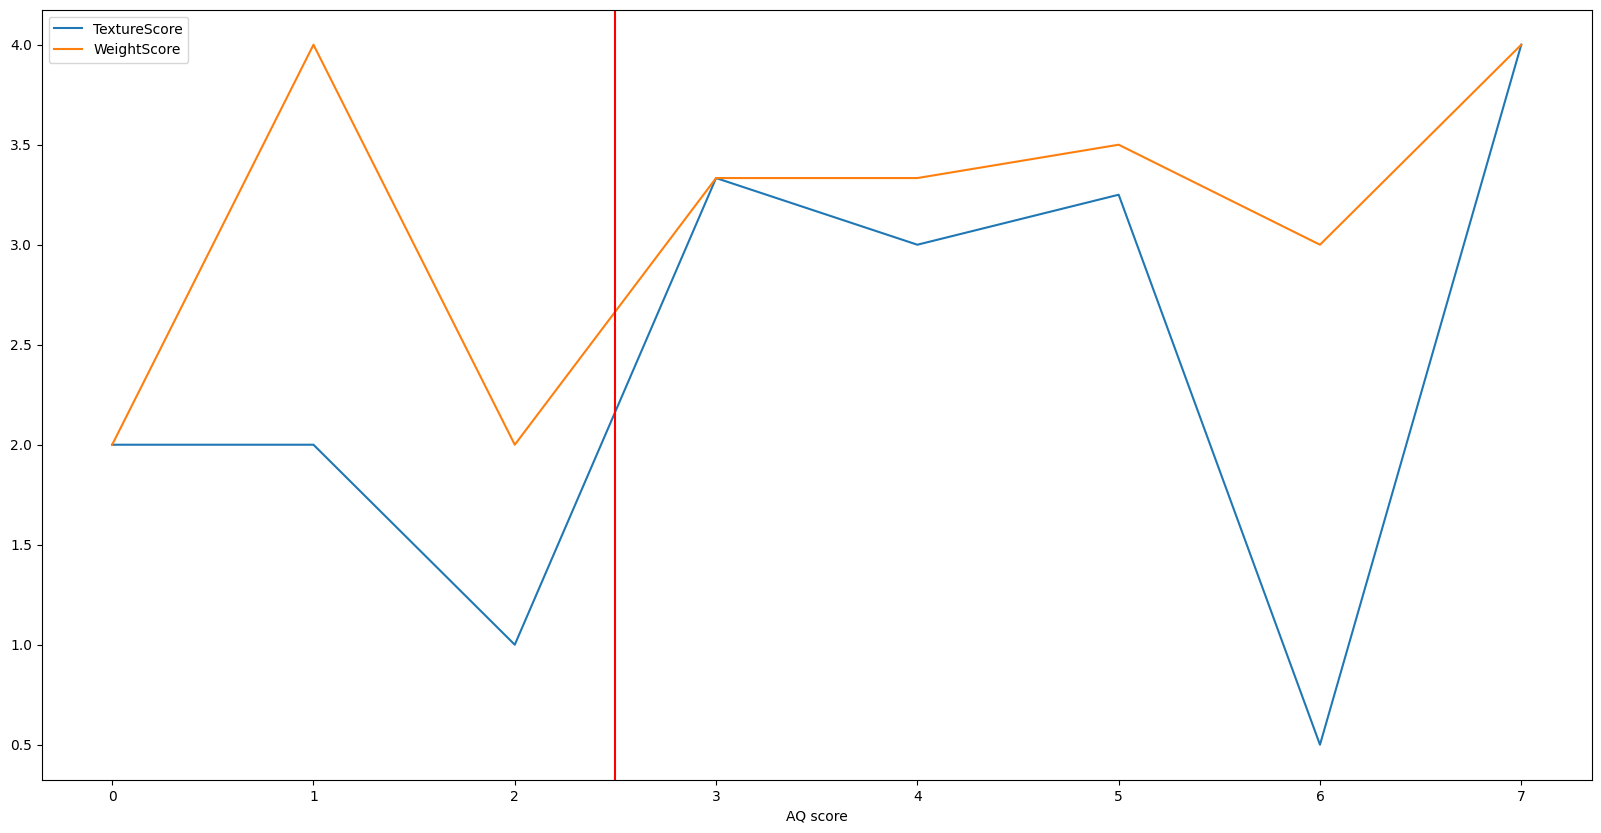

In [32]:
df = get_data()
df["count"] = 1
df = df.groupby(by = "AQ10_Score", as_index=False).agg(
    {
        "TextureScore" : "mean",
        "WeightScore" : "mean",
        "SummedUpScore" : "mean",
        "FullGuessScore" : "mean",
        "count" : "sum"
    }
)

plt.figure(figsize=(20,10))
plt.plot([i for i in range(8)], df.TextureScore, label = "TextureScore")
plt.plot([i for i in range(8)], df.WeightScore, label = "WeightScore")
# plt.plot([i for i in range(8)], df.SummedUpScore, label = "SummedUpScore")
# plt.plot([i for i in range(8)], df.FullGuessScore, label = "FullGuessScore")
plt.axvline(x=2.5, color='r', linestyle='-')
# plt.plot([i for i in range(8)], df["count"], label = "Count")
plt.xlabel("AQ score")
plt.legend()

df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,Hand_Cms,TextureScore,WeightScore,SummedUpScore,FullGuessScore,count
0,16.5,4.000000,4.000000,8.00,4.00,1
1,17.0,3.000000,4.000000,7.00,3.00,1
2,17.5,4.000000,4.000000,8.00,4.00,1
3,18.0,3.000000,2.000000,5.00,1.50,2
4,18.3,1.000000,2.000000,3.00,0.00,1
5,18.5,3.000000,4.000000,7.00,3.00,2
6,19.0,2.750000,4.000000,6.75,2.75,4
7,19.4,2.000000,4.000000,6.00,2.00,1
8,19.5,3.000000,3.000000,6.00,2.00,2
9,19.6,4.000000,2.000000,6.00,2.00,1


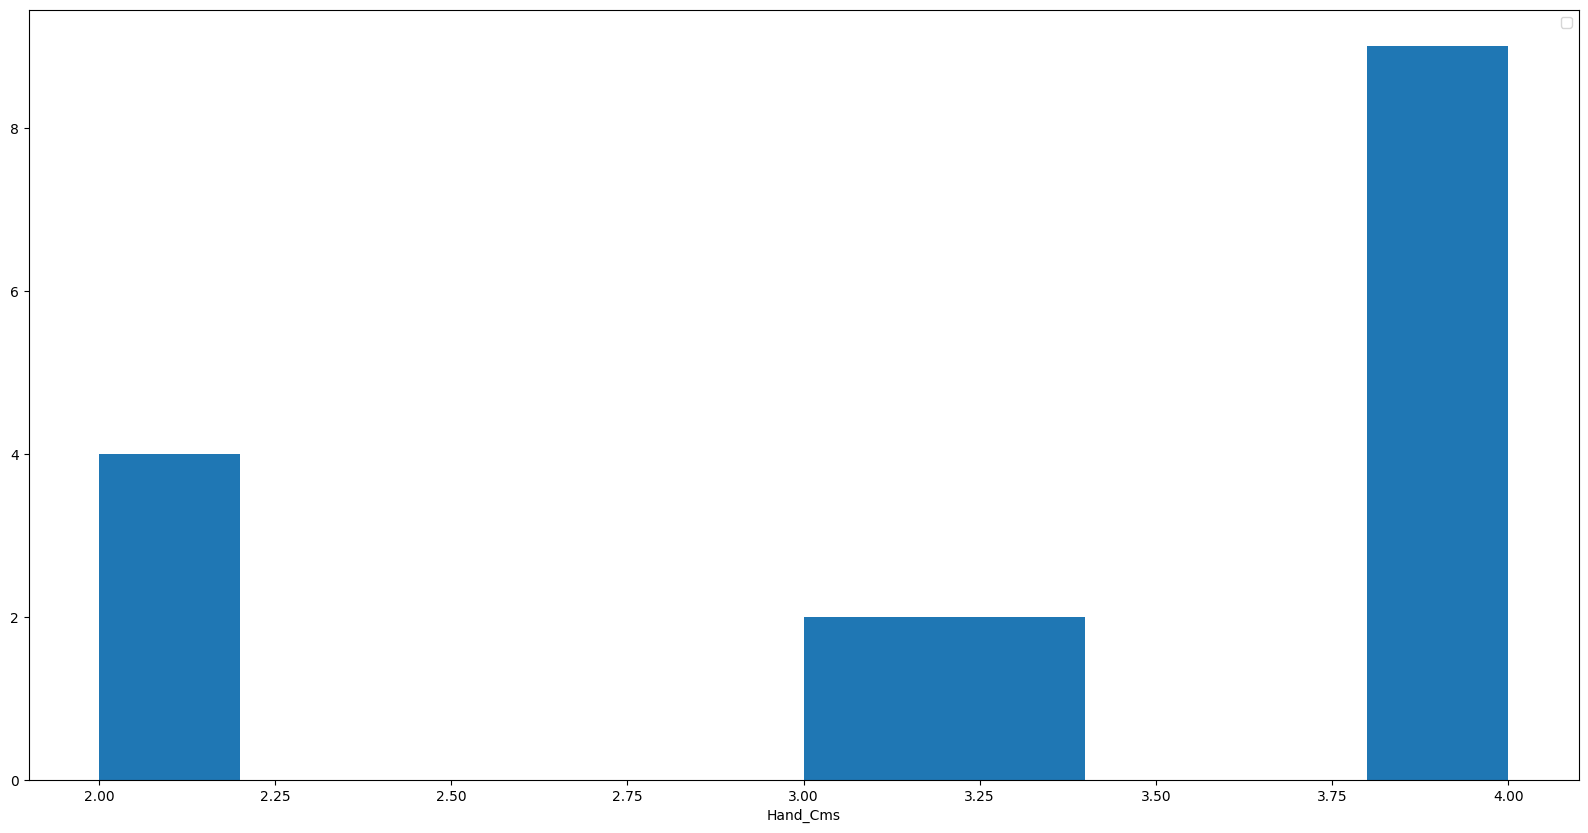

In [49]:
df = get_data()
df["count"] = 1
# Hand_Cms	Arm_Cms
df = df.groupby(by = "Hand_Cms", as_index=False).agg(
    {
        "TextureScore" : "mean",
        "WeightScore" : "mean",
        "SummedUpScore" : "mean",
        "FullGuessScore" : "mean",
        "count" : "sum"
    }
)

plt.figure(figsize=(20,10))
# plt.plot(df.Arm_Cms, df.TextureScore, label = "TextureScore")
plt.hist(df.WeightScore)
# plt.plot([i for i in range(8)], df.SummedUpScore, label = "SummedUpScore")
# plt.plot([i for i in range(8)], df.FullGuessScore, label = "FullGuessScore")
# plt.axvline(x=2.5, color='r', linestyle='-')
# plt.plot([i for i in range(8)], df["count"], label = "Count")
plt.xlabel("Hand_Cms")
plt.legend()

df

In [27]:
for inteval_list in [
    [0,1,10],
    [0,2,10],
    [0,3,10],
    [0,4,10],
    [0,5,10],

    [0,2,5,10],
    [0,2,7,10],

    [0,3,5,10],
    [0,3,7,10],

    [0,2,4,10],
    [0,4,5,10],
]:
    get_statistics_for_AQ10(inteval_list)

grouping_interval: [0, 1, 10]
columnName: TextureScore
len left: 4| len right: 26
mean left: 2| mean right: 2.92
p_value for alternative greater: 0.92
p_value for alternative less 0.08
-------------------------------
columnName: WeightScore
len left: 4| len right: 26
mean left: 3.5| mean right: 3.31
p_value for alternative greater: 0.36
p_value for alternative less 0.64
-------------------------------
columnName: SummedUpScore
len left: 4| len right: 26
mean left: 5.5| mean right: 6.23
p_value for alternative greater: 0.81
p_value for alternative less 0.19
-------------------------------
columnName: FullGuessScore
len left: 4| len right: 26
mean left: 1.75| mean right: 2.42
p_value for alternative greater: 0.85
p_value for alternative less 0.15
-------------------------------


grouping_interval: [0, 2, 10]
columnName: TextureScore
len left: 5| len right: 25
mean left: 1.8| mean right: 3
p_value for alternative greater: 0.98
p_value for alternative less 0.02
---------------------------